## Interpolation in SciPy
- Interpolation is a mathematical method for constructing a function from a discrete set of data points. 
- The interpolation function, or interpolant, should exactly coincide with the given data points, and it can also be evaluated for other intermediate input values within the sampled range. 
- There are many applications of interpolation: 
    - A typical use-case that provides an intuitive picture is the plotting of a smooth curve through a given set of data points. 
    - Another use-case is to approximate complicated functions, which, for example, could be computationally demanding to evaluate. 
    - In that case, it can be beneficial to evaluate the original function only at a limited number of points and use interpolation to approximate the function when evaluating it for intermediary points.
- The interpolation techniques are available in `scipy.interpolate` package.

#### One-dimensional Interpolation
In `scipy.interpolate` we have `interp1d` for one-dimensional interpolation and `UnivariateSpline` for cubic spline interpolation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline

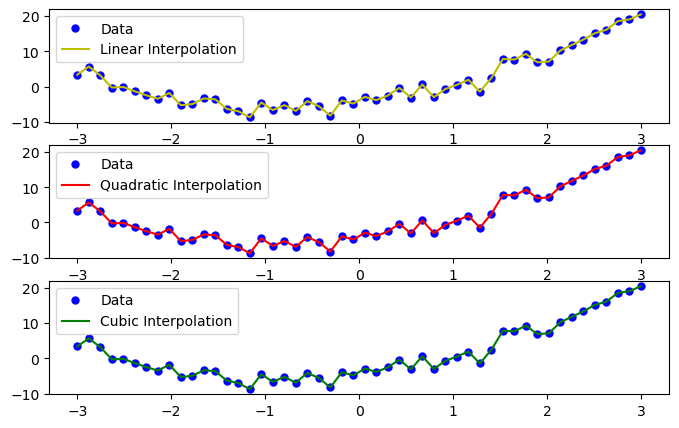

In [9]:
# First we create a data set which passing through the data points
# in the range $x \in (-3,3)$ and function $y = 2x^2+3x-5$ and add
# some noise to the data values.
x = np.linspace(-3, 3, 50)
y = 2*x**2 + 3*x - 5 + 1.5*np.random.randn(50)

# We now plot these data points
fig, ax = plt.subplots(3,1,figsize=(8,5))
for i in range(3):
    ax[i].plot(x, y, 'bo', ms = 5, label='Data')

# We fit the data using 1D-interpolating polynomial `interp1d`
# Here the paramter `kind = linear` represents the linear polynomial
# `kind=quadratic` represents the quadratic polynomial
# `kind=cubic` represents the cubi polynomial
# for more information refer to the help(interp1d)

lp1 = interp1d(x,y,kind='linear')
xs = np.linspace(-3,3,50)
ax[0].plot(xs, lp1(xs), '-y', lw = 1.5, label='Linear Interpolation')
ax[0].legend()

lp2 = interp1d(x,y,kind='quadratic')
xs = np.linspace(-3,3,50)
ax[1].plot(xs, lp2(xs), '-r', lw = 1.5, label='Quadratic Interpolation')
ax[1].legend()

lp3 = interp1d(x,y,kind='cubic')
xs = np.linspace(-3,3,50)
ax[2].plot(xs, lp3(xs), '-g', lw = 1.5, label='Cubic Interpolation')
ax[2].legend()

plt.show()

In [6]:
help(interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadra

#### Cubic Spline Interpolation

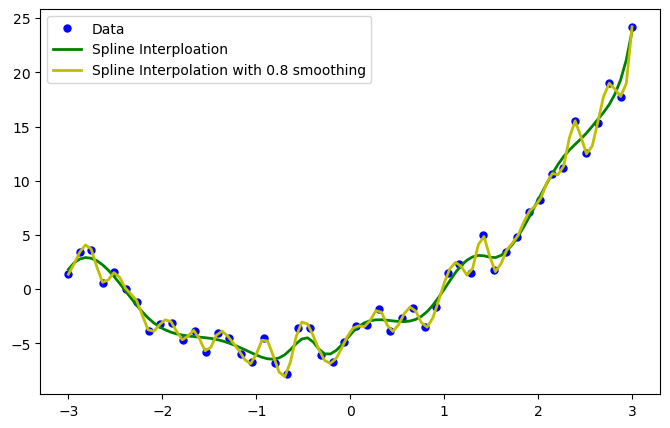

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

np.random.seed(100)

# First we create a data set which passing through the data points
# in the range $x \in (-3,3)$ and function $y = 2x^2+3x-5$ and add
# some noise to the data values.
x = np.linspace(-3, 3, 50)
y = 2*x**2 + 3*x - 5 + 1.5*np.random.randn(50)

# We now plot these data points
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, y, 'bo', ms = 5, label='Data')

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 100)
ax.plot(xs, spl(xs), 'g', lw = 2, \
         label='Spline Interploation')

#print(spl.get_coeffs())

# For increasing the smooth ness of the fitted line we can use the 
# spl.set_smoothing_factor(n)
# Smoothing can sometimes overfit the data so you need to be cautious
# while using this setting.

spl.set_smoothing_factor(0)
ax.plot(xs, spl(xs), 'y', lw = 2, \
         label='Spline Interpolation with 0.8 smoothing')
ax.legend()

#print(spl.get_coeffs())

plt.show()